In [4]:
import matplotlib.pyplot as plt #used to make the plots below
%matplotlib inline  
#makes them print in the jupyter notebook
import numpy as np          
import pandas as pd             #Use this for data loading and statistics
from collections import OrderedDict #use this sort sorting the dictionary 
#These are used in the graphing function below:
colors=["red","orange", "yellow","green","blue","purple","salmon","darkorange","c","seagreen","steelblue","violet","darkgray","brown"]


In [5]:
classes_FS01=pd.read_excel("61331_Classes_FS01-US16_part1.xlsx")       #reads the data file and saves it
classes_FS01_2=pd.read_excel("61331_Classes_FS01-US16_part2.xlsx") 

#demographs=pd.read_excel("61331_Demogs_FS01-US16_part1.xlsx")
#demographs_02=pd.read_excel("61331_Demogs_FS01-US16_part2.xlsx")

In [6]:
# add both parts together, Make sure they are 551,937 total before moving on!
df_class=classes_FS01.append(classes_FS01_2,ignore_index=True) 

#df_demograph=demographs.append(demographs_02,ignore_index=True)


In [7]:
print("length of class data frame (should be 511,937)",len(df_class))
print(df_class.head())
#print("length of demographic data frame(should be )",len(df_demograph))

length of class data frame (should be 511,937) 551937
  crse_code grade_code  majo_ code  major_code       major_name  \
0       251        2.5      3611.0         NaN   Earth Science    
1       126        3.0      3611.0         NaN   Earth Science    
2       232        1.0      3611.0         NaN   Earth Science    
3       252        1.5      3611.0         NaN   Earth Science    
4       110        2.0      4494.0         NaN     Social Work    

                          placeholderID repeat_status_flag  sctn_code  \
0  97758DD4-7286-4A19-BA6C-00005FE6CFA3                          24.0   
1  97758DD4-7286-4A19-BA6C-00005FE6CFA3                 SR        5.0   
2  97758DD4-7286-4A19-BA6C-00005FE6CFA3                           1.0   
3  97758DD4-7286-4A19-BA6C-00005FE6CFA3                          20.0   
4  592FB87B-B37F-476D-B7F0-0001F057D6A6                           8.0   

  subj_code term_code  term_seq_id  
0       PHY      FS01         1014  
1       MTH      SS02         

In [8]:
def Course_Area_Chart_majors(table_master,major_group,subject,course,title):
    title_name=subject+" "+course+ title+ "Majors" #this combines the suject and the course together to make the title
    sbjt=table_master[table_master.subj_code==subject] #sorts by the suject 
    major_sort=sbjt[sbjt["major_name"].isin(major_group)]
    crse_sort=major_sort[major_sort.crse_code==course] # sorts by the course
   
    #these are the colors used for the plot
    colors=["red","orange", "yellow","green","blue","purple","salmon","c","seagreen","steelblue","violet","darkgray","brown"]
    np.random.seed(9) #keeps the random colors the same each time
    
    unique_term = np.unique(crse_sort["term_code"]) #this give the unique term of the course and subject
    sort_key= {"SS":0,"US":1,"FS":2} #this is the order to sort the list
    unique_term=sorted( unique_term, key = lambda x : (x[2:],sort_key[x[:2]])) #this sorts the list
    include_terms=[]#this will be added to later on in the function
    unique_grade =["0.0","1.0","1.5","2.0","2.5","3.0","3.5","4.0"] #makes a list of the unique values in the set
    result= {} #this creates a dictonary to do the counting and sorting    
    
    for term in unique_term:
        term_sort=crse_sort[crse_sort.term_code==term] #this iterates through the courses and then the term
        #this will count the total of the people taking the class
        number_peeps=sum([len(term_sort[term_sort.grade_code==g]) for g in unique_grade]) 
        if number_peeps==0:   #this will skip the sections that did have anyone in them
            continue
        include_terms.append(term) #this will add the term that have thing in them to graph

        for grade in unique_grade:
            grade_term_sort=term_sort[term_sort.grade_code==grade] #this will now take the terms and sort out the grades
            percent_w_grade=len(grade_term_sort)/number_peeps #this normalizes the list to put in the graph
            if grade not in result:
                result[grade]=[]
            result[grade].append(percent_w_grade) #this will then not get messed up by the non gpa numbers
           
    results_stack=[]
    for grade in unique_grade:
        time_line=result[grade] #this adds the terms to a list to be able to graph
        results_stack.append(time_line)
        top=0
        bottom=0
        
        for key,value in result.items():
            top += float(key)*value[0]
            bottom += value[0]
        average=top/bottom
        #print("Overall GPA:",average) 
    custom_ticks=np.arange(len(include_terms)) #this will count the terms to be able to graph them    
    plt.figure(figsize=(15,2)) #creates a larger plot
    plt.xticks(custom_ticks, include_terms,rotation='vertical') #this adds the labels to the bottom 
    plt.stackplot(custom_ticks,results_stack,colors=colors) #this actually plots the data and uses the colors
    plt.title(title_name) #uses the added titles from above
    plt.ylabel("Percentage")
    plt.xlabel("Semesters")
    plt.ylim(0,1)
    plt.grid()
    plt.legend(unique_grade,bbox_to_anchor=(1.1, 1.2)) #this adds the legend to the side 
    plt.show()
    

In [9]:
stem_majors=[' Physics and Geophysics ',' Chemical Physics ',' Geophysics ',' Accounting ',' Actuarial Science ',' Agr & Nat Res   No Preference',' Ag,Food & Natural Resources Ed ',' Agri Business',' Agribusiness Management ',' Agric & Natural Resources Comm ',' Agricultural Industries ',' Agricultural Operations ',' Agriscience ',' Animal Science ',' Anthropology ',' Applied Mathematics ',' Applied Plant Science ',' Applied Statistics ',' Audiology and Speech Sciences ',' Beef Cattle Management ',' Biochem&Molecular Biol/Biotech ',' Biochemistry ',' Biochemistry & Molecular Biol ',' Biochemistry/Biotechnology ',' Biological Science ',' Biological Science Interdept',' Biology ',' Biomedical Laboratory Science ',' Botany ',' Botany and Plant Pathology ',' Building Construction Mgt ',' Cell and Molecular Biology ',' Chemistry ',' Clinical Laboratory Sciences ',' Communication ',' Communicative Sci & Disorders ',' Computational Chemistry ',' Computational Mathematics ',' Computer Science ',' Crop and Soil Sciences ',' Diagnostic Molecular Science ',' Dietetics ',' Earth Science Interdept',' Earth Science ',' Economic Geography ',' Electrical Technology ',' Entomology ',' Envir Biol/Botany & Plant Path ',' Envir Biology/Microbiology ',' Envir Biology/Plant Biology ',' Envir Studies & Sustainability ' ,' Envir Studies and Agriscience ',' Environ Biology/Microbiology ',' Environ Studies & Applications ',' Environmental Biol/Plant Biol ',' Environmental Biology/Botany ',' Environmental Biology/Zoology ',' Environmental Economics & Mgt ',' Environmental Economics&Policy ',' Environmental Geography ',' Environmental Geosciences ',' Environmental Sci & Mgt ',' Environmental Soil Science ',' Epidemiology ',' Finance ',' Fisheries and Wildlife ',' Food Science ',' Forensic Science ',' Forestry ',' Fruit & Vegetable Crop Mgt ',' General Science ',' General Science Interdept',' Genomics & Molecular Genetics ',' Geographic Information Science ',' Geography ',' Geological Sciences ',' Global & Area Studies Soc Sci',' Global & Intl Stdys in Soc Sci ',' Graphic Design ',' Horticulture ',' Human Biology ',' Human Geography ',' Human Medicine ',' Industrial Mathematics ',' Integrative Pharmacology ',' Intr Stdy S S Public Plcy Stdy',' Intr Stdy Soc Sci Cmty Rel',' Intr Stdy Soc Sci Envir Policy',' Intr Stdy Soc Sci Health Stdy',' Intr Stdy Soc Sci Hm Res Scty',' Intr Stdy Soc Sci Human Aging',' Intr Stdy Soc Sci Intl Studies',' Intr Stdy Soc Sci Law&Society',' Intr Stdys Soc Sci: Soc Sci Ed ',' Intr Studies in Social Science ',' Kinesiology ',' LBS Animal Science ',' Mathematics ',' Mathematics, Advanced ',' Media Arts and Technology ',' Media and Communication Tech ',' Microbiol & Molecular Genetics ',' Microbiology ',' Natural Res Recreation & Tour ',' Natural Science No Preference',' Neuroscience ',' Nursing ',' Nutritional Sciences ',' Organic Farming ',' Osteopathic Medicine ',' Pharmacology & Toxicology ',' Physical Science ',' Physical Science Interdept',' Physics and Geophysics ',' Physiology ',' Plant Biology ',' Plant Breeding & Genetics CSS',' Plant Pathology ',' Predental ',' Premedical ',' Prenursing ',' Preoptometry ',' Preveterinary ',' Psychology ',' Public Health ',' School Psychology ',' Science & Technology Studies ',' Statistics ',' Swine Management ',' Technology Systems Management ',' Telecommunication ',' Urban and Regional Planning ',' Veterinary Medicine ',' Veterinary Technology ',' Viticulture ',' Zoology ']

nonstem_majors=[' Advertising ',' African American & African Std ',' American Studies ',' Ancient Studies ',' Apparel and Textile Design ',' Apparel and Textiles ',' Arabic ',' Art History and Visual Culture ',' Arts & Letters   General',' Arts and Humanities ',' Athletic Training ',' Business Analytics ',' Business Preference',' Business Administration ',' Business Admitted',' Child Development ',' Chinese ',' Classical Studies ',' Clinical Social Work ',' Commercial Floriculture ',' Community Sustainability ',' Comparative Culture & Politics ' ,' Composition ',' Composition and Music Theory ',' Construction Management ',' Criminal Justice ',' Dairy Management ',' Dairy Production ',' East Asian Languages & Culture ',' Economics ',' English ',' English Language Center ',' Experience Architecture ',' Family & Consumer Resources ',' Family Community Services ',' Family and Consumer Sciences ',' Film Studies ',' Food Industry Management ',' French ',' General Business Admin ',' General Business Admin Prelaw',' General Management ',' German ',' Global Stdys Arts & Humanities ',' Hist,Philosophy & Soc of Sci ',' History ',' History of Art ',' Horse Management ',' Hospitality Business ',' Human Devel and Family Studies ',' Human Devl and Family Studies ',' Human Resource Management ',' Human Resources and Labor Rel ',' Humanities Prelaw',' Interdisciplinary Humanities ',' Interior Design ',' Interior Design&Facilities Mgt ',' International Relations ',' James Madison ',' Japanese ',' Jazz Studies ',' Journalism ',' Landscape Architecture ',' Landscape Management ',' Landscape and Lawn Management ',' Landscape and Nursery ',' Landscape and Nursery Mgt ',' Language Program ',' Latin ',' Law ',' Linguistics ',' Livestock Industries ',' Management ',' Management,Strategy,Leadership ',' Manufacturing Engineering ',' Marketing ',' Media and Information ',' Medical Technology ',' Merchandising Management ',' Music ',' Music Education ',' Music Performance ',' Music Therapy ',' Park, Recreation & Tourism Res ',' Philosophy ',' Pol Theory&Constitutional Dem ',' Policy and Applied Economics ',' Political Economy ',' Political Science ',' Political Science Prelaw',' Professional Writing ',' Public Admin and Public Policy ',' Public Affairs Management ',' Public Policy ',' Public Resource Management ',' Religious Studies ',' Residential Coll in Arts & Hum ',' Resource Development ',' Retailing ',' Russian ',' School Music   No Major',' Social Relations ',' Social Relations and Policy ',' Social Work ',' Sociology ',' Spanish ',' Special E Emotional Impairment',' Sports and Commercial Turf Mgt ',' Studio Art ',' Supply Chain Management ',' Sustainable Parks,Rec and Tour ',' Teaching Cert Internship Year ',' Telecomm, Info Studies & Media ',' Theatre ',' Turfgrass Management ',' Turfgrass Management Golf'," Women's Studies "," Women's and Gender Studies ",' World Politics ']

Enigeering=[' Applied Engineering Sciences ',' Biosystems Engineering ',' Chemical Engineering ',' Civil Engineering ',' Computer Engineering ',' Electrical Engineering ',' Engineering   No Preference',' Engineering Arts ',' Engineering Mechanics ',' Environmental Engineering ',' Materials Sci and Engineering ',' Mechanical Engineering ',' Packaging ']

phy_ast=[' Physics ',' Astrophysics ',' Astrophysics and Astronomy ']

education=[' Early Care and Education ',' Art Education ',' Curriculum and Teaching ',' Education ',' Elementary Education ',' History Education ',' Instrumental Music Education ',' Lifelong Education ',' Mathematics Education ',' Music Education ',' Phys Ed & Exercise Science ',' Special E Emotional Impairment',' Special Ed Deaf Education',' Special Ed Learn Disabilities',' Special Ed Visual Impairment',' Stringed Instrument Music Ed ',' Teaching and Curriculum ',' Vocal General Music Education']

other=[' High School Guest ',' Law Non Degree Guest',' Transient Major ']

no_preference=[' No Preference ']

lbs=[' LBS Astrophysics ',' LBS Animal Science ',' LBS Biochem and Molecular Biol ',' LBS Biochemistry ',' LBS Biochemistry/Biotechnology ',' LBS Biological Science ',' LBS Biology Field of Concent',' LBS Botany and Plant Pathology ',' LBS Chemical Physics ',' LBS Chemistry ',' LBS Computational Chemistry ',' LBS Computational Mathematics ',' LBS Computer Science ',' LBS Computer Science   FC',' LBS Earth Science   FC',' LBS Earth Science Interdept',' LBS Entomology ',' LBS Envir Biology/Plant Biol ',' LBS Envir Biology/Zoology ',' LBS Envir/Bio/Botany & Plant P ',' LBS Envir/Biology/Microbiology ',' LBS Environ Sci and Management ',' LBS Environmental Geosciences ',' LBS General Science Interdept',' LBS Genomics & Molecular Genet ',' LBS Geological Sciences ',' LBS Geological Sciences ',' LBS Mathematics ',' LBS Medical Technology ',' LBS Microbiology ',' LBS Nutritional Sciences ',' LBS Physical Science   FC',' LBS Physical Science Interdept',' LBS Physics ',' LBS Physics and Geophysics ',' LBS Physiology ',' LBS Plant Biology ',' LBS Science & Tech Studies  FC',' LBS Statistics ',' LBS Zoology ',' Lyman Briggs ',' Lyman Briggs School ']


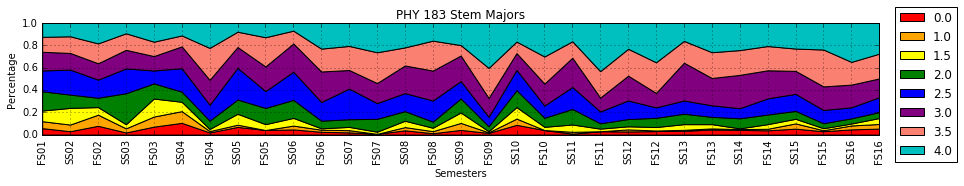

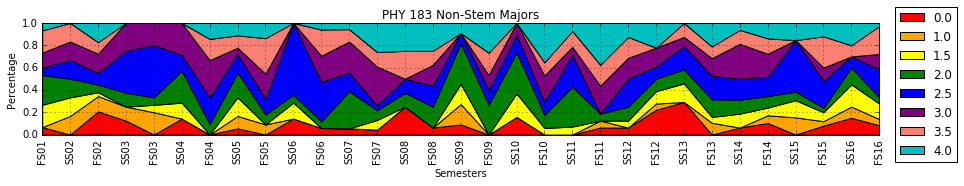

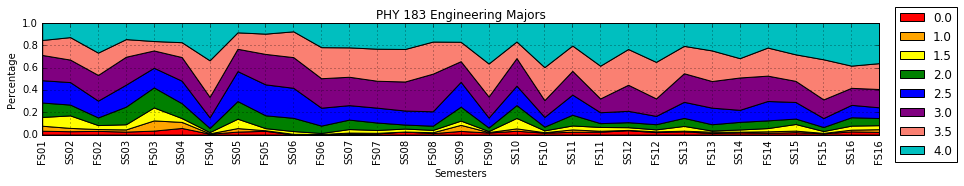

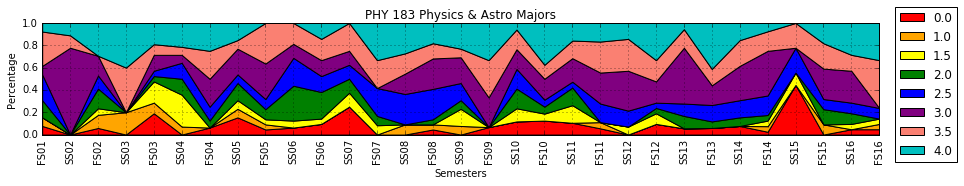

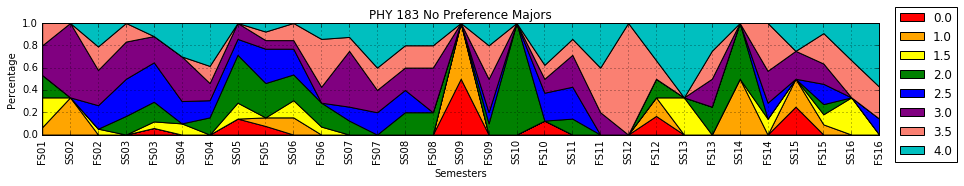

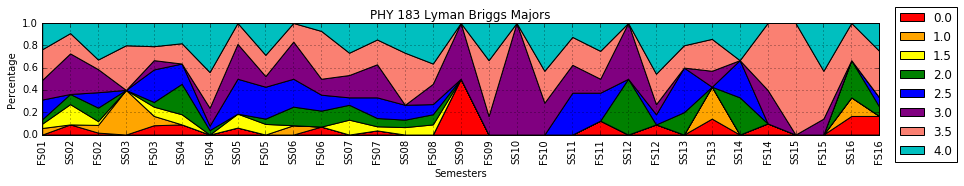

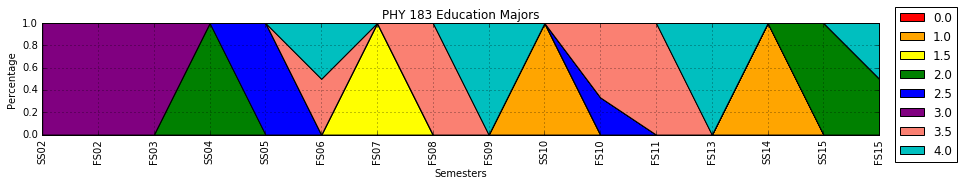

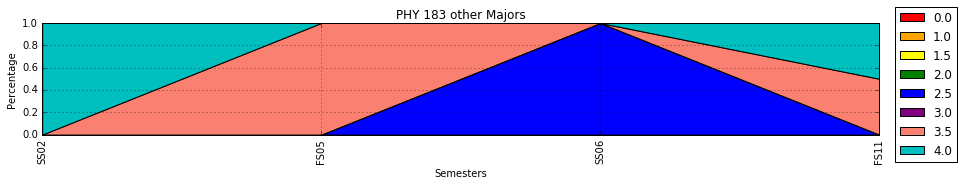

In [10]:
Course_Area_Chart_majors(df_class,stem_majors,"PHY","183"," Stem ")
Course_Area_Chart_majors(df_class,nonstem_majors,"PHY","183"," Non-Stem ")

Course_Area_Chart_majors(df_class,Enigeering,"PHY","183"," Engineering ")
Course_Area_Chart_majors(df_class,phy_ast,"PHY","183"," Physics & Astro ")

Course_Area_Chart_majors(df_class,no_preference,"PHY","183"," No Preference ")
Course_Area_Chart_majors(df_class,lbs,"PHY","183"," Lyman Briggs ")

Course_Area_Chart_majors(df_class,education,"PHY","183"," Education ")
Course_Area_Chart_majors(df_class,other,"PHY","183"," other ")

In [11]:
#this was used to check my code
table_master= df_class
major_group=Enigeering
subject="PHY"
course="183"
title=" Stem "

title_name=subject+" "+course+ title+ "Majors" #this combines the suject and the course together to make the title
sbjt=table_master[table_master.subj_code==subject] #sorts by the suject 
major_sort=sbjt[sbjt["major_name"].isin(major_group)]
crse_sort=major_sort[major_sort.crse_code==course] # sorts by the course

#these are the colors used for the plot
colors=["red","orange", "yellow","green","blue","purple","salmon","c","seagreen","steelblue","violet","darkgray","brown"]
np.random.seed(9) #keeps the random colors the same each time

unique_term = np.unique(crse_sort["term_code"]) #this give the unique term of the course and subject
sort_key= {"SS":0,"US":1,"FS":2} #this is the order to sort the list
unique_term=sorted( unique_term, key = lambda x : (x[2:],sort_key[x[:2]])) #this sorts the list
include_terms=[]#this will be added to later on in the function
unique_grade =["0.0","1.0","1.5","2.0","2.5","3.0","3.5","4.0"] #makes a list of the unique values in the set
result= {} #this creates a dictonary to do the counting and sorting    

for term in unique_term:
    term_sort=crse_sort[crse_sort.term_code==term] #this iterates through pthe courses and then the term
    #this will count the total of the people taking the class
    number_peeps=sum([len(term_sort[term_sort.grade_code==g]) for g in unique_grade]) 
    if number_peeps==0:   #this will skip the sections that did have anyone in them
        continue
    include_terms.append(term) #this will add the term that have thing in them to graph
    print(include_terms)
    for grade in unique_grade:
        grade_term_sort=term_sort[term_sort.grade_code==grade] #this will now take the terms and sort out the grades
        percent_w_grade=len(grade_term_sort)/number_peeps#this normalizes the list to put in the graph
        if grade not in result:
            result[grade]=[]
        result[grade].append(percent_w_grade) #this will then not get messed up by the non gpa numbers
        
    top=0
    bottom=0
    for key,value in result.items():
        top += float(key)*value[0]
        bottom += value[0]
    average=top/bottom
#print("Overall GPA:",average)

['FS01']
['FS01', 'SS02']
['FS01', 'SS02', 'FS02']
['FS01', 'SS02', 'FS02', 'SS03']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04', 'FS04']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04', 'FS04', 'SS05']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04', 'FS04', 'SS05', 'FS05']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04', 'FS04', 'SS05', 'FS05', 'SS06']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04', 'FS04', 'SS05', 'FS05', 'SS06', 'FS06']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04', 'FS04', 'SS05', 'FS05', 'SS06', 'FS06', 'SS07']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04', 'FS04', 'SS05', 'FS05', 'SS06', 'FS06', 'SS07', 'FS07']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04', 'FS04', 'SS05', 'FS05', 'SS06', 'FS06', 'SS07', 'FS07', 'SS08']
['FS01', 'SS02', 'FS02', 'SS03', 'FS03', 'SS04', 'FS04', 'SS05', 'FS05', 'SS06', 'FS06', 'SS07', 'FS07', 'SS08', 'FS08']
['FS01', 'SS02', 'FS02', 

This was an evolution of my code, I soon gave up on the visual, which made me lead to making code to just find the GPA's of majors. This had good structure that I will reuse code in following notebooks